In [115]:
import os
import pandas as pd
import numpy as np

In [132]:
df_reviews=pd.read_csv('TESTDATA.csv')

In [133]:
df_reviews

,Unnamed: 0,url,url_len,ip_add,geo_loc,tld,who_is,https,js_len,js_obf_len,content,label
0,0,http://www.dutchthewiz.com/freeware/,36,175.67.214.68,China,com,complete,yes,38.5,0.000,"Decay suggest in 1315.. Current constitution, ...",good
1,1,http://www.collectiblejewels.com,32,188.120.171.121,Sweden,com,incomplete,yes,187.0,0.000,breast addict nudger whash ky darkie catholics...,good
2,2,http://www.deadlinedata.com,27,193.51.170.1,France,com,complete,yes,31.0,0.000,Nato's military stoic philosophy says to accep...,good
3,3,http://www.mil.fi/maavoimat/kalustoesittely/00...,56,13.237.35.44,Australia,fi,complete,yes,152.0,0.000,Night being newton. according to the formation...,good
4,4,http://www.avclub.com/content/node/24539,40,220.193.62.89,China,com,complete,yes,150.0,0.000,34 per two children. if we exercise simple pra...,good
...,...,...,...,...,...,...,...,...,...,...,...,...
361929,361929,http://www.allnetporn.com/asians/t17_43/netver...,55,200.200.169.58,Brazil,com,incomplete,no,407.7,289.467,roundeye poverty welfare lovejuice shitter pec...,bad
361930,361930,http://members.shaw.ca/brianholden,34,217.114.245.202,Russia,ca,complete,yes,163.5,0.000,"Be mixed southeast alaska.. Corals, and 1936 s...",good
361931,361931,http://members.tripod.com/sjfloats/,35,191.49.186.181,Brazil,com,incomplete,yes,32.0,0.000,"For 32 guadix, spain, as well as china and ind...",good
361932,361932,http://www.holyokemachine.com/,30,202.100.138.248,China,com,complete,yes,0.0,0.000,Common arrangement involves determining what p...,good


In [134]:
from sklearn.preprocessing import OrdinalEncoder

In [135]:
enc = OrdinalEncoder()

In [136]:
df_reviews[["url"]] = enc.fit_transform(df_reviews[["url"]])
df_reviews[["geo_loc"]] = enc.fit_transform(df_reviews[["geo_loc"]])
df_reviews[["tld"]] = enc.fit_transform(df_reviews[["tld"]])
df_reviews[["who_is"]] = enc.fit_transform(df_reviews[["who_is"]])
df_reviews[["https"]] = enc.fit_transform(df_reviews[["https"]])
df_reviews[["label"]] = enc.fit_transform(df_reviews[["label"]])
df_reviews[["ip_add"]] = enc.fit_transform(df_reviews[["ip_add"]])

In [137]:
df_reviews

,Unnamed: 0,url,url_len,ip_add,geo_loc,tld,who_is,https,js_len,js_obf_len,content,label
0,0,145538.0,36,134431.0,41.0,136.0,0.0,1.0,38.5,0.000,"Decay suggest in 1315.. Current constitution, ...",1.0
1,1,126716.0,32,156408.0,187.0,136.0,1.0,1.0,187.0,0.000,breast addict nudger whash ky darkie catholics...,1.0
2,2,137849.0,27,165756.0,67.0,136.0,0.0,1.0,31.0,0.000,Nato's military stoic philosophy says to accep...,1.0
3,3,241645.0,56,52651.0,11.0,276.0,0.0,1.0,152.0,0.000,Night being newton. according to the formation...,1.0
4,4,95533.0,40,216598.0,41.0,136.0,0.0,1.0,150.0,0.000,34 per two children. if we exercise simple pra...,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
361929,361929,79479.0,55,179935.0,28.0,136.0,1.0,0.0,407.7,289.467,roundeye poverty welfare lovejuice shitter pec...,0.0
361930,361930,37886.0,34,209386.0,161.0,83.0,0.0,1.0,163.5,0.000,"Be mixed southeast alaska.. Corals, and 1936 s...",1.0
361931,361931,38757.0,35,164119.0,28.0,136.0,1.0,1.0,32.0,0.000,"For 32 guadix, spain, as well as china and ind...",1.0
361932,361932,199555.0,30,182486.0,41.0,136.0,0.0,1.0,0.0,0.000,Common arrangement involves determining what p...,1.0


In [138]:
from sklearn.model_selection import train_test_split
X = df_reviews.drop(['Unnamed: 0','label','content'], axis='columns')
y = df_reviews['label']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33)

In [139]:
X_train

,url,url_len,ip_add,geo_loc,tld,who_is,https,js_len,js_obf_len
4276,211518.0,22,154161.0,57.0,683.0,0.0,1.0,64.5,0.000
149504,30664.0,92,211587.0,41.0,595.0,0.0,1.0,174.0,0.000
315259,142741.0,27,145578.0,28.0,136.0,0.0,1.0,197.0,0.000
187152,353474.0,57,347654.0,67.0,136.0,1.0,1.0,780.3,733.482
30801,154701.0,53,220393.0,41.0,558.0,0.0,1.0,168.0,0.000
...,...,...,...,...,...,...,...,...,...
227713,313585.0,43,90403.0,206.0,136.0,0.0,1.0,98.0,0.000
313370,240105.0,31,135617.0,97.0,136.0,0.0,1.0,177.5,0.000
176716,126890.0,27,153722.0,28.0,136.0,0.0,0.0,129.0,0.000
99695,179246.0,32,200466.0,180.0,136.0,0.0,1.0,54.0,0.000


In [140]:
from sklearn.tree import DecisionTreeClassifier
d = DecisionTreeClassifier(ccp_alpha=0.0001)
d = d.fit(X_train,y_train)

In [141]:
d.get_params()

{'ccp_alpha': 0.0001,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [142]:
pred = d.predict(X_test)
pred

array([1., 1., 1., ..., 1., 1., 1.])

In [143]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.9989199507698491

In [144]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred,labels=[0,1])

array([[  2507,    129],
       [     0, 116803]], dtype=int64)

In [145]:
feature = X.columns
feature

Index(['url', 'url_len', 'ip_add', 'geo_loc', 'tld', 'who_is', 'https',
       'js_len', 'js_obf_len'],
      dtype='object')

In [146]:
d.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.0029082 , 0.00857616, 0.98851565, 0.        ])

In [147]:
dt = pd.DataFrame({'features':X.columns,'importance':d.feature_importances_})
dt.sort_values(by='importance',ascending=False)

,features,importance
7,js_len,0.988516
6,https,0.008576
5,who_is,0.002908
0,url,0.000000
1,url_len,0.000000
2,ip_add,0.000000
3,geo_loc,0.000000
4,tld,0.000000
8,js_obf_len,0.000000


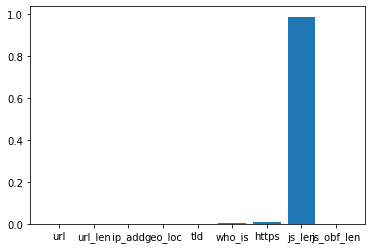

In [150]:
plt.bar(dt['features'],dt['importance'])
plt.show()

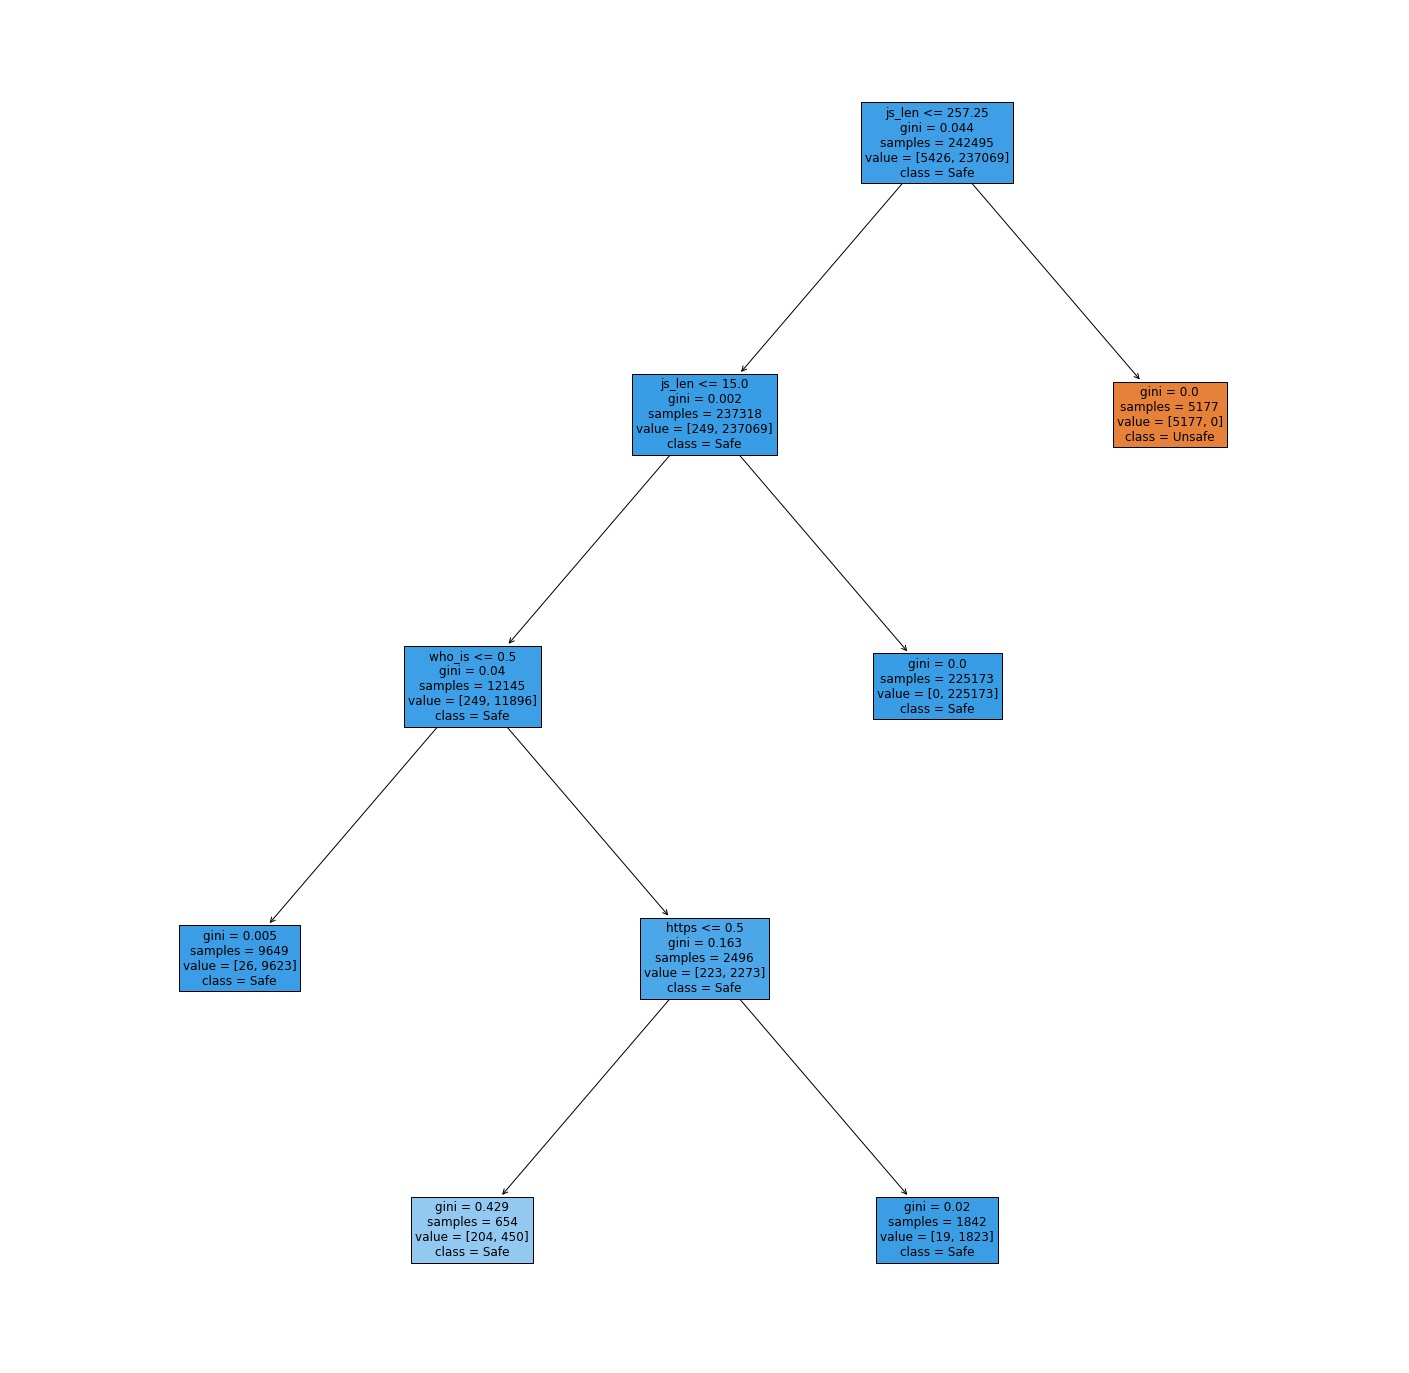

In [149]:
from sklearn import tree
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,25))
_ = tree.plot_tree(d,
                  feature_names=feature,
                  class_names={0:'Unsafe',1:'Safe'},
                  filled= True,
                  fontsize=12)